# MNIST Dataset

In [2]:
import tensorflow as dataset
import numpy as np
from tensorflow.keras.datasets import mnist
import pandas as pd
train_data,test_data=mnist.load_data()
print(type(train_data))
print(len(train_data))
train_images,train_labels=train_data
train_images
print(type(f'DType Type of train_images{train_images}'))
print(type(f'DType of train_labels{train_labels}'))
print(train_images.shape)
print(train_labels.shape)

test_images,test_labels=test_data
print(test_images.shape)





<class 'tuple'>
2
<class 'str'>
<class 'str'>
(60000, 28, 28)
(60000,)
(10000, 28, 28)


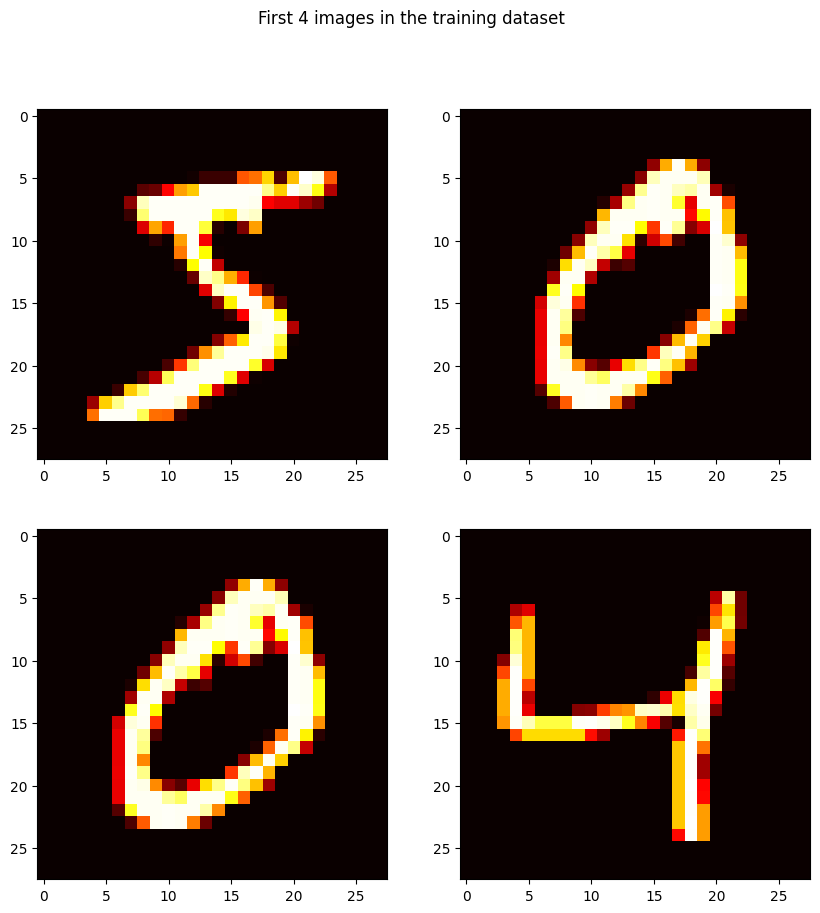

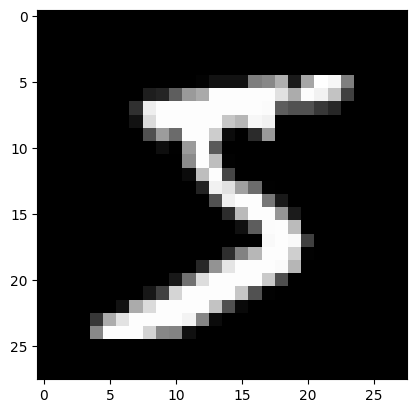

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

fig1,axs=plt.subplots(2,2,figsize=(10,10))
fig1.suptitle('First 4 images in the training dataset')

fig2,axs1=plt.subplots()
axs1.imshow(train_images[0],cmap='gray')


for i in range (2):
    for j in range(2):
        axs[i,j].imshow(train_images[i+j],cmap='hot')
        
     


In [4]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model= Sequential(name='MyFirstModel',layers=[keras.Input(shape=(28*28,),batch_size=128),
                                            Dense(200,activation='relu',kernel_initializer='glorot_uniform',bias_initializer='zeros',name='hlayer1'),
                                            Dense(100,activation='relu'),
                                            Dense(10,activation='softmax'),],trainable=True)

model.summary()

Model: "MyFirstModel"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hlayer1 (Dense)                 │ (128, 200)             │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (128, 100)             │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (128, 10)              │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

## Configures the model for training

1. compile method

In [5]:
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])


In [6]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255 
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

print(train_images.shape)
print(train_images.ndim)

(60000, 784)
2


In [7]:
# One-hot encode the labels
train_labels = keras.utils.to_categorical(train_labels, num_classes=10)
test_labels = keras.utils.to_categorical(test_labels, num_classes=10)

train_labels.shape

(60000, 10)

2. fit method

In [9]:
histary=model.fit(train_images,train_labels,batch_size=128,epochs=10,validation_split=0.2)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9924 - loss: 0.0013 - val_accuracy: 0.9735 - val_loss: 0.0041
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9944 - loss: 0.0010 - val_accuracy: 0.9752 - val_loss: 0.0039
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9948 - loss: 9.2995e-04 - val_accuracy: 0.9753 - val_loss: 0.0038
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9943 - loss: 9.6568e-04 - val_accuracy: 0.9729 - val_loss: 0.0042
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9938 - loss: 0.0010 - val_accuracy: 0.9746 - val_loss: 0.0039
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9961 - loss: 7.1050e-04 - val_accuracy: 0.9771 - val_loss: 0.0037
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9953 - loss: 8.1945e-04 - val_accuracy: 0.9699 - val_loss: 0.0047
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9947 - loss: 8.8523e-0

AttributeError: 'dict' object has no attribute 'getvalues'

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
[0.9928333163261414, 0.9937499761581421, 0.9946874976158142, 0.9938541650772095, 0.9940624833106995, 0.9957083463668823, 0.9946249723434448, 0.9947708249092102, 0.9956666827201843, 0.9953333139419556]
[0.9928333163261414, 0.9937499761581421, 0.9946874976158142, 0.9938541650772095, 0.9940624833106995, 0.9957083463668823, 0.9946249723434448, 0.9947708249092102, 0.9956666827201843, 0.9953333139419556]


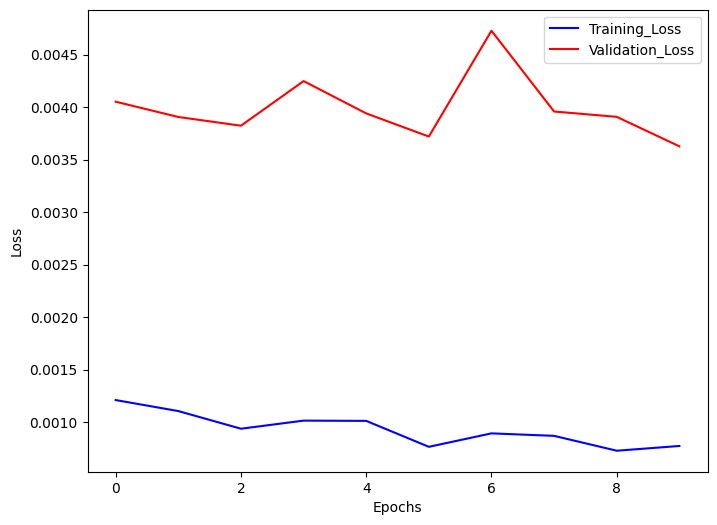

In [23]:
print(histary.history.keys())
print(histary.history['accuracy'])
print(histary.history.get('accuracy'))

train_loss=histary.history['loss']
validation_loss=histary.history['val_loss']
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.plot(train_loss,label='Training_Loss',color='blue')
plt.plot(validation_loss,label='Validation_Loss',color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

3. evaluate method

In [ ]:
model.evaluate(test_images,test_labels,batch_size=128)

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9722 - loss: 0.0043


[0.0036651543341577053, 0.9764999747276306]

In [ ]:
test_image=test_images[1]
print(test_image)

test_label=test_labels[1]
print(test_label)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.45490196 0.49019608
 0.67058825 1.         1.         0.5882353  0.3

In [ ]:
model.predict(test_image.reshape(1,784))
print(np.argmax(model.predict(test_image.reshape(1,784))))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
2
